1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami for earthquakes measured with the mb magnitude type.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
quakes = pd.read_csv('data/earthquakes.csv')

In [3]:
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [4]:
mb_quakes = quakes.query('magType == "mb" ')[['mag','tsunami']]

In [5]:
mb_quakes

,mag,tsunami
9,4.7,0
13,4.5,0
55,4.6,0
67,4.6,0
91,4.7,0
...,...,...
9297,4.2,0
9304,5.1,1
9309,4.8,0
9319,4.4,0


Text(0.5, 1.0, 'Correlation between magnitude in mb and tsunami')

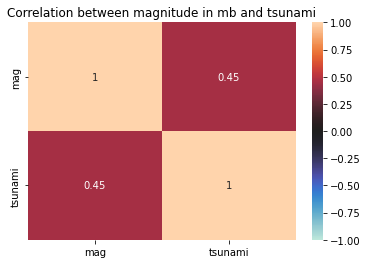

In [6]:
sns.heatmap(mb_quakes.corr(),
    annot=True, center=0, vmin=-1, vmax=1)
plt.title('Correlation between magnitude in mb and tsunami')

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, butmake sure to use subplots.)

In [7]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
# Tukey's fences is one of the most popular simple outlier detectors for one-dimensional number arrays.

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

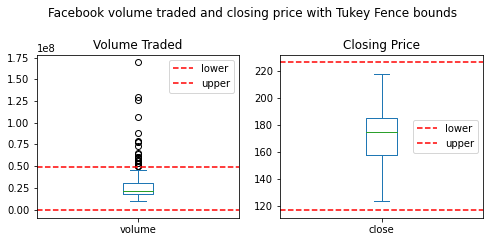

In [8]:
cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound, 
            color='red', 
            linestyle='dashed',
            label=name
        )
        ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

3. Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed vertical line on the date that it surpassed 1 million. Be sure to format the tick labels on the y-axis accordingly.

In [9]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [10]:
cumulative_covid_cases = covid.groupby(pd.Grouper(freq='1D')).cases.sum().apply('cumsum')

In [11]:
over1M = cumulative_covid_cases[cumulative_covid_cases >= 1000000.0].index[0]

In [56]:
over1M

Timestamp('2020-04-03 00:00:00', freq='D')

Text(2020-05-21, 2020-04-03 00:00:00, '1 Million cases\n(2020-04-03)')

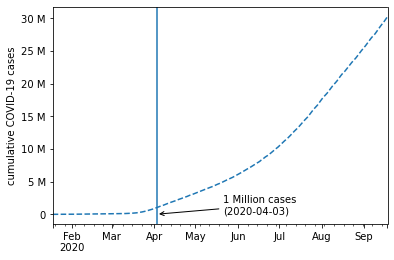

In [12]:
from matplotlib.ticker import EngFormatter 

ax = cumulative_covid_cases.plot(style=['--'])
ax.axvline(over1M)

ax.set(xlabel='', ylabel='cumulative COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

plt.annotate(
    f'1 Million cases\n({over1M.strftime("2020-04-03")})',
    xy=('2020-04-03 00:00:00', over1M),
    xytext=('2020-05-21', over1M),
    arrowprops={'arrowstyle': '->'}
)


4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

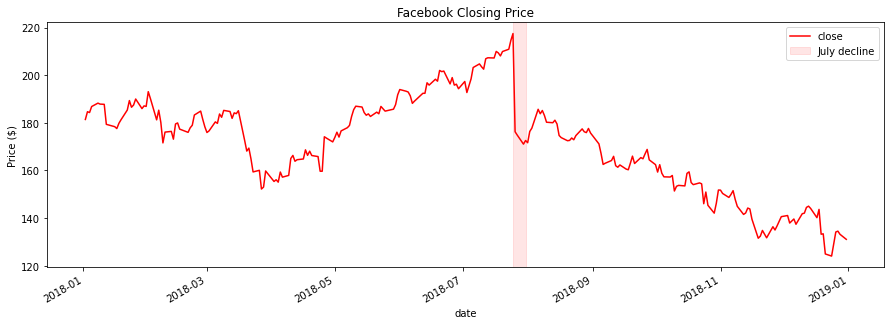

In [48]:
fb.close.plot(kind='line', figsize=(15, 5), color='red')
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.1, label='July decline', color= 'red',
)
plt.ylabel('Price ($)')
plt.title('Facebook Closing Price')
plt.legend()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price: a) Disappointing user growth announced after close on July 25, 2018 b) Cambridge Analytica story breaks on March 19, 2018 (when it affected the market) c) FTC launches investigation on March 20, 2018

In [82]:
y_value

168.15

Text(0.5, 0.98, 'Facebook Closing Price')

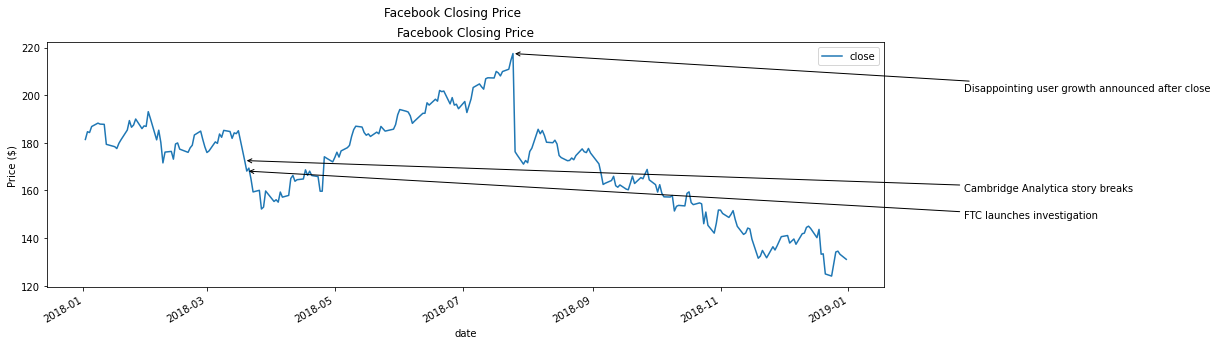

In [84]:
fb_close.plot(kind='line', title='FB Closing Price', figsize=(15, 5))

plt.ylabel('Price ($)')
plt.title('Facebook Closing Price')

notes = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# for repeatable random jitter
np.random.seed(1)

for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(
        text, 
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')